<a href="https://colab.research.google.com/github/VOL-EM2024/mo/blob/main/%D1%82%D0%B5%D0%BA%D1%81%D1%824.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* набор данных минимум 1000 строк, в идеале от 10k
* классика - нормализация, регистр, лемматизация
* векторизация двумя способами count vectorizer/tf-idf vectorizer (допбаллы за добавление биграмм/триграмм)
* построить сеть с обычными линейными(Dense) слоями - для единой структуры сети проверить данные с разными векторами (обучение, проверка на тестовых данных) - с учетом метрики какой способ векторизации оказался более эффективен?
* для лучшей модели построить матрицу путаницы и отчет о классификации (classification report) - сделать выводы о качестве работы классификатора в разрезе классов
* токенизировать нормализованный текст с помощью Tokenizer(Keras) и построить сеть с начальным Embbeding слоем - обучите сеть - лучше она той, что у вас была лучшей при обычной векторизации?
* построить сеть с LSTM слоем - обучить - проверить качество

In [1]:
import zipfile
import json
import pandas as pd
from tqdm import tqdm

In [2]:
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=4ae3b14fb2e428e171f8dc8d83cb8e02ad8241dad8368b5005c4a1b4d45c2d0a
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pymorphy2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [6]:
df = pd.read_csv('/content/train_data.csv')
df

,id,text,author
0,0,-Бабушка!- вскричала малютка.- Возьми меня с с...,Dostoevsky
1,1,"Знал ли Скрудж об этом? Разумеется, знал. Да и...",Dostoevsky
2,2,"-С праздником, дядя, с радостью! Дай вам Бог в...",Dostoevsky
3,3,Мы высказали только главную передовую мысль на...,Dostoevsky
4,4,"I. Отдел литературный. Повести, романы, расска...",Dostoevsky
...,...,...,...
1729,1729,"-Хотелось бы мне, чтоб он был здесь.\nКанторек...",Remark
1730,1730,Но для нас в этом-то и заключается их несостоя...,Remark
1731,1731,"-Как дела, Франц?- спрашивает Кропп.\nКеммерих...",Remark
1732,1732,"Мюллер наклоняется:\n-Мы принесли твои вещи, Ф...",Remark


In [8]:
df.drop(['id'], axis=1, inplace=True)

In [9]:
df.head()

,text,author
0,-Бабушка!- вскричала малютка.- Возьми меня с с...,Dostoevsky
1,"Знал ли Скрудж об этом? Разумеется, знал. Да и...",Dostoevsky
2,"-С праздником, дядя, с радостью! Дай вам Бог в...",Dostoevsky
3,Мы высказали только главную передовую мысль на...,Dostoevsky
4,"I. Отдел литературный. Повести, романы, расска...",Dostoevsky


In [10]:
import nltk
from nltk.corpus import stopwords
from string import punctuation

In [11]:
nltk.download("stopwords")
russian_stopwords = stopwords.words("russian")
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
text=df['text'] #берем столбец с текстом
norm_text=[]
# 1 - только буквы
# 2 - перевод в нижний регистр
# 3 - привести все слова в единую форму
morph=pymorphy2.MorphAnalyzer()
for s in tqdm(text):
    s1 = re.sub(r'[^\w\s]+|[\d]+', r'',s).strip()
    s1 = s1.lower()
    s1 = word_tokenize(s1) #токенизация
    words=[]
    for i in s1:
        pv = morph.parse(i)
        words.append(pv[0].normal_form)
    sentence=' '.join(words)
    norm_text.append(sentence)

100%|██████████| 1734/1734 [02:18<00:00, 12.48it/s]


In [13]:
df['Post_norm'] = norm_text
df

Векторизация

TFIDF (биграмма, триграмма)

In [14]:
vectorizer_tfidf = TfidfVectorizer(max_features=500, min_df=20, max_df=0.7, stop_words=russian_stopwords, ngram_range=(1,1))
text_tfidf = vectorizer_tfidf.fit_transform(norm_text)
text_tfidf = pd.DataFrame(text_tfidf.toarray(),columns=vectorizer_tfidf.get_feature_names_out())
text_tfidf.head()

,автор,алиса,баба,бабушка,бежать,белый,берег,близкий,бог,больший,...,чтоть,чуб,чувство,чувствовать,чёрный,шаг,шесть,широкий,школа,язык
0,0.0,0.0,0.0,0.455099,0.0,0.000000,0.0,0.0,0.072576,0.07445,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.039889,0.0,0.0,0.000000,0.00000,...,0.036162,0.0,0.043811,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.105188,0.00000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
vectorizer_tfidf2 = TfidfVectorizer(max_features=500, min_df=10, max_df=0.7, stop_words=russian_stopwords, ngram_range=(2,2))
text_tfidf2 = vectorizer_tfidf2.fit_transform(norm_text)
text_tfidf2 = pd.DataFrame(text_tfidf2.toarray(),columns=vectorizer_tfidf2.get_feature_names_out())
text_tfidf2.head()

,алиса селезнёв,аммос фёдорович,бас дегтярь,белый свет,блистать месяц,бог знать,бог это,больший часть,большой весь,браниться время,...,это свой,это сделать,это сказать,это слово,это случай,это случиться,это совершенно,это хороший,это человек,это это
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.203176,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [16]:
vectorizer_tfidf3 = TfidfVectorizer(max_features=500, min_df=3, max_df=0.9, stop_words=russian_stopwords, ngram_range=(3, 3))
text_tfidf3 = vectorizer_tfidf3.fit_transform(norm_text)
text_tfidf3 = pd.DataFrame(text_tfidf3.toarray(), columns=vectorizer_tfidf3.get_feature_names_out())
text_tfidf3.head()

,бас дегтярь микит,бегать взад вперёд,берёзовый тавлинка исколоть,блистать месяц всё,браниться время раздумывать,брать кой черта,браться живот смех,варенуха всё это,ваш покорный слуга,вверх месяц пропасть,...,чудно право дать,чудо светло снег,шапка стиснуть рука,шинкарить зузуля привезти,шутка всё мирянин,эраст петрович знать,это заманчивый правда,эх табак добрый,ящик свой комната,ёлка поспешно чиркнуть
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.129295
1,0.0,0.074526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076086,0.000000
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


CountVectorizer (биграмма, триграмма)

In [17]:
vectorizer = CountVectorizer(max_features=500, min_df=20, max_df=0.7, stop_words=russian_stopwords,ngram_range=(1,1))
text_cv = vectorizer.fit_transform(norm_text)
text_cv = pd.DataFrame(text_cv.toarray(), columns=vectorizer.get_feature_names_out())
text_cv.head()

,автор,алиса,баба,бабушка,бежать,белый,берег,близкий,бог,больший,...,чтоть,чуб,чувство,чувствовать,чёрный,шаг,шесть,широкий,школа,язык
0,0,0,0,4,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
vectorizer2 = CountVectorizer(max_features=500, min_df=10, max_df=0.7, stop_words=russian_stopwords, ngram_range=(2, 2))
text_cv2 = vectorizer2.fit_transform(norm_text)
text_cv2 = pd.DataFrame(text_cv2.toarray(), columns=vectorizer2.get_feature_names_out())
text_cv2.head()

,алиса селезнёв,аммос фёдорович,бас дегтярь,белый свет,блистать месяц,бог знать,бог это,больший часть,большой весь,браниться время,...,это свой,это сделать,это сказать,это слово,это случай,это случиться,это совершенно,это хороший,это человек,это это
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
vectorizer3 = CountVectorizer(max_features=500, min_df=3, max_df=0.9, stop_words=russian_stopwords, ngram_range=(3, 3))
text_cv3 = vectorizer3.fit_transform(norm_text)
text_cv3 = pd.DataFrame(text_cv3.toarray(), columns=vectorizer3.get_feature_names_out())
text_cv3.head()

,бас дегтярь микит,бегать взад вперёд,берёзовый тавлинка исколоть,блистать месяц всё,браниться время раздумывать,брать кой черта,браться живот смех,варенуха всё это,ваш покорный слуга,вверх месяц пропасть,...,чудно право дать,чудо светло снег,шапка стиснуть рука,шинкарить зузуля привезти,шутка всё мирянин,эраст петрович знать,это заманчивый правда,эх табак добрый,ящик свой комната,ёлка поспешно чиркнуть
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Модели

In [20]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [21]:
scal_X_cv = StandardScaler().fit_transform(text_cv)
scal_X_cv = pd.DataFrame(scal_X_cv, columns=text_cv.columns)

In [23]:
encoder = LabelEncoder()
y = encoder.fit_transform(df['author'])
y = to_categorical(y)

In [24]:
from keras.preprocessing.text import Tokenizer

In [25]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(norm_text)

X = tokenizer.texts_to_sequences(norm_text)

vocab_size = len(tokenizer.word_index) + 1

In [26]:
vocab_size

31356

In [27]:
print(norm_text[0])
print(X[0])

бабушка вскричать малютка взять я с себя я знать что ты уйти как только погаснуть спичка уйти как тёплый печка чудесный жареный гусь и больший славный ёлка и она поспешно чиркнуть весь остаток спичка который быть у она в рука так она хотеться удержать бабушка и спичка вспыхнуть такой яркий пламя что стать светлый чем день никогда ещё бабушка не быть такой красивый такой величественный она взять девочка на рука и они полететь вместе в сияние и в блеск высоковысокий туда где нет ни холод ни голод ни страх к бог в холодный утренний час в угол за дом попрежний сидеть девочка с розовый щёчка и улыбка на уста но мёртвый она замёрзлый в последний вечер старое год новогодний солнце осветить маленький труп девочка сидеть с спичка один пачка почти совсем обгореть она хотеть погреться бедняжка говорить человек но никто и не знать что она видеть в какой блеск вознестись вместе с бабушка к новогодний радость на небо начать с тот что марля умереть в это нет ни малый сомнение акт о он погребение быть

In [28]:
from keras.utils import pad_sequences
maxlen = 50

X = pad_sequences(X, padding='post', maxlen=maxlen)

print(X[0, :])

[ 808  375  437    2 2173 1156 2382 3715  200   44  437  325   19   28
  705 5582  465 6178 1156   14    2 2383 2909  135   83    1  635 2174
 2625    3 3280    6 6179   56 1050   15  602   32  330   38 6180  754
    7  879    8  437  196   13 2173 1156]


In [29]:
from keras import layers

embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size,
                           output_dim=embedding_dim,
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           3135600   
                                                                 
 flatten (Flatten)           (None, 5000)              0         
                                                                 
 dense (Dense)               (None, 50)                250050    
                                                                 
 dense_1 (Dense)             (None, 8)                 408       
                                                                 
Total params: 3386058 (12.92 MB)
Trainable params: 3386058 (12.92 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=0)

In [31]:
history=model.fit(X_train, y_train, epochs=5, batch_size=5, validation_data=(X_valid, y_valid))

acc=model.evaluate(X_test, y_test)
print(np.array(acc)[1].round(2))

Epoch 1/5
222/222 [==============================] - 12s 51ms/step - loss: 1.9590 - accuracy: 0.2462 - val_loss: 1.7514 - val_accuracy: 0.3237
Epoch 2/5
222/222 [==============================] - 10s 45ms/step - loss: 0.6551 - accuracy: 0.8683 - val_loss: 1.7012 - val_accuracy: 0.3921
Epoch 3/5
222/222 [==============================] - 13s 58ms/step - loss: 0.0859 - accuracy: 0.9720 - val_loss: 1.7172 - val_accuracy: 0.3705
Epoch 4/5
222/222 [==============================] - 11s 50ms/step - loss: 0.0616 - accuracy: 0.9757 - val_loss: 1.6831 - val_accuracy: 0.3849
Epoch 5/5
11/11 [==============================] - 0s 4ms/step - loss: 1.8044 - accuracy: 0.3429
0.34


In [32]:
import pickle

In [33]:
with open('encoder.pickle', 'wb') as handle:
    pickle.dump(encoder, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [34]:
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

CountVectorizer-модель

In [35]:
X_train_full, X_test, y_train_full, y_test = train_test_split(scal_X_cv, y, test_size=0.2, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=0)

In [36]:
model = keras.models.Sequential()
model.add(Dense(256, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy"])

history=model.fit(X_train, y_train, epochs=5, batch_size=5, validation_data=(X_valid, y_valid))

acc=model.evaluate(X_test, y_test)
print(np.array(acc)[1].round(2))

Epoch 1/5
222/222 [==============================] - 2s 6ms/step - loss: 1.6122 - accuracy: 0.4220 - val_loss: 1.0750 - val_accuracy: 0.6187
Epoch 2/5
222/222 [==============================] - 1s 5ms/step - loss: 0.5208 - accuracy: 0.8314 - val_loss: 1.1754 - val_accuracy: 0.5827
Epoch 3/5
222/222 [==============================] - 1s 4ms/step - loss: 0.1380 - accuracy: 0.9585 - val_loss: 1.2770 - val_accuracy: 0.6007
Epoch 4/5
222/222 [==============================] - 2s 9ms/step - loss: 0.0979 - accuracy: 0.9720 - val_loss: 1.1724 - val_accuracy: 0.6547
Epoch 5/5
11/11 [==============================] - 0s 9ms/step - loss: 1.2613 - accuracy: 0.6599
0.66


In [37]:
model.save('emotion_detect.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


TFIDF-модель

In [39]:
X_train_full, X_test, y_train_full, y_test = train_test_split(text_tfidf, y, test_size=0.2, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=0)

In [40]:
model = keras.models.Sequential()
model.add(Dense(256, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy"])

history=model.fit(X_train, y_train, epochs=5, batch_size=5, validation_data=(X_valid, y_valid))

acc=model.evaluate(X_test, y_test)
print(np.array(acc)[1].round(2))

Epoch 1/5
222/222 [==============================] - 2s 6ms/step - loss: 1.6912 - accuracy: 0.3904 - val_loss: 1.0837 - val_accuracy: 0.6583
Epoch 2/5
222/222 [==============================] - 1s 7ms/step - loss: 0.7679 - accuracy: 0.7304 - val_loss: 0.9889 - val_accuracy: 0.6583
Epoch 3/5
222/222 [==============================] - 2s 7ms/step - loss: 0.3217 - accuracy: 0.8945 - val_loss: 1.1073 - val_accuracy: 0.6619
Epoch 4/5
222/222 [==============================] - 1s 7ms/step - loss: 0.1622 - accuracy: 0.9405 - val_loss: 1.2189 - val_accuracy: 0.6403
Epoch 5/5
11/11 [==============================] - 0s 3ms/step - loss: 1.3178 - accuracy: 0.6657
0.67


Лучшая модель (матрица ошибок и репорт)

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [42]:
# Оценка модели
predictions = model.predict(X_test)
predictions = predictions.argmax(axis=1)
y_test_argmax = y_test.argmax(axis=1)

11/11 [==============================] - 1s 5ms/step


In [43]:
cm = confusion_matrix(predictions, y_test_argmax)

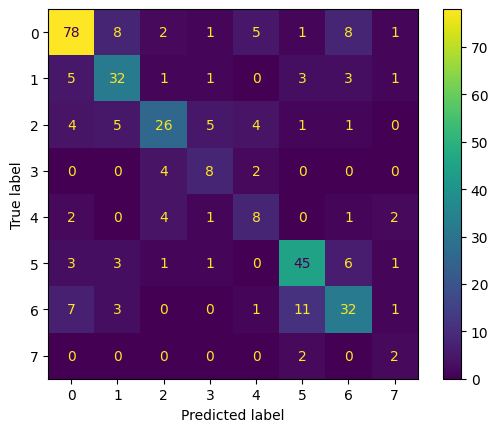

In [44]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test_argmax, predictions))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77        99
           1       0.70      0.63      0.66        51
           2       0.57      0.68      0.62        38
           3       0.57      0.47      0.52        17
           4       0.44      0.40      0.42        20
           5       0.75      0.71      0.73        63
           6       0.58      0.63      0.60        51
           7       0.50      0.25      0.33         8

    accuracy                           0.67       347
   macro avg       0.61      0.57      0.58       347
weighted avg       0.66      0.67      0.66       347



In [47]:
model.save('emotion_detect.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Tokenizer Keras

In [48]:
from keras.preprocessing.text import Tokenizer

In [49]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(norm_text)

X = tokenizer.texts_to_sequences(norm_text)

vocab_size = len(tokenizer.word_index) + 1

In [50]:
vocab_size

31356

In [51]:
print(norm_text[0])
print(X[0])

бабушка вскричать малютка взять я с себя я знать что ты уйти как только погаснуть спичка уйти как тёплый печка чудесный жареный гусь и больший славный ёлка и она поспешно чиркнуть весь остаток спичка который быть у она в рука так она хотеться удержать бабушка и спичка вспыхнуть такой яркий пламя что стать светлый чем день никогда ещё бабушка не быть такой красивый такой величественный она взять девочка на рука и они полететь вместе в сияние и в блеск высоковысокий туда где нет ни холод ни голод ни страх к бог в холодный утренний час в угол за дом попрежний сидеть девочка с розовый щёчка и улыбка на уста но мёртвый она замёрзлый в последний вечер старое год новогодний солнце осветить маленький труп девочка сидеть с спичка один пачка почти совсем обгореть она хотеть погреться бедняжка говорить человек но никто и не знать что она видеть в какой блеск вознестись вместе с бабушка к новогодний радость на небо начать с тот что марля умереть в это нет ни малый сомнение акт о он погребение быть

In [52]:
from keras.utils import pad_sequences
maxlen = 100

X = pad_sequences(X, padding='post', maxlen=maxlen)

print(X[0, :])

[   4 5579    8 2272 3981 6892 5580    1 3714 1729   44  398 2272   33
 2766   10  228 1192  529 6893    5 5581   24   18   16    7   35    4
   60 3279   56 1367  217  879    8  437   13 2173 1156  252    6    3
   92   34  117    6 6177 1905    7   68  808  375  437    2 2173 1156
 2382 3715  200   44  437  325   19   28  705 5582  465 6178 1156   14
    2 2383 2909  135   83    1  635 2174 2625    3 3280    6 6179   56
 1050   15  602   32  330   38 6180  754    7  879    8  437  196   13
 2173 1156]


In [53]:
from keras import layers

embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size,
                           output_dim=embedding_dim,
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          3135600   
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_10 (Dense)            (None, 50)                500050    
                                                                 
 dense_11 (Dense)            (None, 8)                 408       
                                                                 
Total params: 3636058 (13.87 MB)
Trainable params: 3636058 (13.87 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=0)

In [55]:
history=model.fit(X_train, y_train, epochs=5, batch_size=5, validation_data=(X_valid, y_valid))

acc=model.evaluate(X_test, y_test)
print(np.array(acc)[1].round(2))

Epoch 1/5
222/222 [==============================] - 17s 68ms/step - loss: 1.9162 - accuracy: 0.2759 - val_loss: 1.6864 - val_accuracy: 0.3489
Epoch 2/5
222/222 [==============================] - 12s 54ms/step - loss: 0.4263 - accuracy: 0.9351 - val_loss: 1.7001 - val_accuracy: 0.3165
Epoch 3/5
222/222 [==============================] - 12s 54ms/step - loss: 0.0769 - accuracy: 0.9666 - val_loss: 1.6524 - val_accuracy: 0.3777
Epoch 4/5
222/222 [==============================] - 12s 53ms/step - loss: 0.0511 - accuracy: 0.9702 - val_loss: 1.6374 - val_accuracy: 0.3813
Epoch 5/5
11/11 [==============================] - 0s 6ms/step - loss: 1.6167 - accuracy: 0.4207
0.42


In [57]:
def predict_class(tokenizer, model,encoder, maxlen,text):
  vector = tokenizer.texts_to_sequences([text])
  vector_x = pad_sequences(vector, padding='post', maxlen=maxlen)
  y_preds = model.predict(vector_x)
  y_class = y_preds.argmax(axis=-1)
  return encoder.inverse_transform(y_class)[0]

In [58]:
#пример с  tokenizer keras
text = 'Ребята, не стоит вскрывать эту тему. Вы молодые, шутливые, вам все легко. Это не то. Это не Чикатило и даже не архивы спецслужб. Сюда лучше не лезть. Серьезно, любой из вас будет жалеть. Лучше закройте тему и забудьте, что тут писалось. Я вполне понимаю, что данным сообщением вызову дополнительный интерес, но хочу сразу предостеречь пытливых - стоп. Остальные просто не найдут.'
predict_class(tokenizer, model,encoder, maxlen, text)

1/1 [==============================] - 0s 63ms/step


'Bulychev'

In [ ]:
model.save('emotion_detect.h5')

LSTM

In [59]:
model_lstm = Sequential()
model_lstm.add(layers.Embedding(input_dim=vocab_size,
                           output_dim=embedding_dim,
                           input_length=maxlen))

model_lstm.add(layers.LSTM(64))
model_lstm.add(layers.Dense(y.shape[1], activation='softmax'))

model_lstm.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy"])
model_lstm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          3135600   
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense_12 (Dense)            (None, 8)                 520       
                                                                 
Total params: 3178360 (12.12 MB)
Trainable params: 3178360 (12.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
history=model_lstm.fit(X_train, y_train, epochs=5, batch_size=5, validation_data=(X_valid, y_valid))

acc=model_lstm.evaluate(X_test, y_test)
print(np.array(acc)[1].round(2))

Epoch 1/5
222/222 [==============================] - 23s 96ms/step - loss: 1.9513 - accuracy: 0.2444 - val_loss: 1.8039 - val_accuracy: 0.3201
Epoch 2/5
222/222 [==============================] - 20s 88ms/step - loss: 1.6378 - accuracy: 0.4130 - val_loss: 1.6955 - val_accuracy: 0.2878
Epoch 3/5
222/222 [==============================] - 20s 89ms/step - loss: 0.8279 - accuracy: 0.7484 - val_loss: 1.5218 - val_accuracy: 0.4424
Epoch 4/5
222/222 [==============================] - 21s 94ms/step - loss: 0.3144 - accuracy: 0.9125 - val_loss: 1.4075 - val_accuracy: 0.5216
Epoch 5/5
11/11 [==============================] - 0s 20ms/step - loss: 1.6405 - accuracy: 0.4870
0.49
